In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls

drive  sample_data


In [ ]:
import pandas as pd
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, MinMaxScaler

import matplotlib.pyplot as plt

In [ ]:
tips = pd.read_csv('drive/MyDrive/Educ/5 Course/DL/tips.csv')

tips

(array([41., 79., 66., 27., 19.,  5.,  4.,  1.,  1.,  1.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

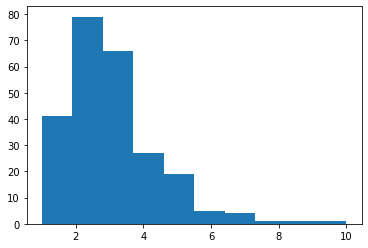

In [ ]:
x = tips['tip'] 
plt.hist(x, bins = 10)

In [ ]:
tips.nunique()

total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64

In [ ]:
oe = OrdinalEncoder()
tips["sex_cat"] = oe.fit_transform(tips[["sex"]])
tips["smoker_cat"] = oe.fit_transform(tips[["smoker"]])
tips["day_cat"] = oe.fit_transform(tips[["day"]])
tips["time_cat"] = oe.fit_transform(tips[["time"]])

tips

,total_bill,tip,sex,smoker,day,time,size,sex_cat,smoker_cat,day_cat,time_cat
0,16.99,1.01,Female,No,Sun,Dinner,2,0.0,0.0,2.0,0.0
1,10.34,1.66,Male,No,Sun,Dinner,3,1.0,0.0,2.0,0.0
2,21.01,3.50,Male,No,Sun,Dinner,3,1.0,0.0,2.0,0.0
3,23.68,3.31,Male,No,Sun,Dinner,2,1.0,0.0,2.0,0.0
4,24.59,3.61,Female,No,Sun,Dinner,4,0.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1.0,0.0,1.0,0.0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.0,1.0,1.0,0.0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1.0,1.0,1.0,0.0
242,17.82,1.75,Male,No,Sat,Dinner,2,1.0,0.0,1.0,0.0


In [ ]:
data = pd.read_csv('drive/MyDrive/Educ/5 Course/DL/hourly_wages_data.csv')

In [ ]:
data

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,5.10,0,8,21,35,1,1,0,1,0
1,4.95,0,9,42,57,1,1,0,1,0
2,6.67,0,12,1,19,0,0,0,1,0
3,4.00,0,12,4,22,0,0,0,0,0
4,7.50,0,12,17,35,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
529,11.36,0,18,5,29,0,0,0,0,0
530,6.10,0,12,33,51,1,1,0,0,0
531,23.25,1,17,25,48,1,1,0,0,0
532,19.88,1,12,13,31,0,1,1,0,0


In [ ]:
data.describe()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,9.024064,0.179775,13.018727,17.822097,36.833333,0.458801,0.655431,0.292135,0.185393,0.044944
std,5.139097,0.384360,2.615373,12.379710,11.726573,0.498767,0.475673,0.455170,0.388981,0.207375
min,1.000000,0.000000,2.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.250000,0.000000,12.000000,8.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.780000,0.000000,12.000000,15.000000,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,11.250000,0.000000,15.000000,26.000000,44.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,44.500000,1.000000,18.000000,55.000000,64.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
y = data['wage_per_hour']
x = data.drop(columns=['wage_per_hour'])

In [ ]:
x.shape, y.shape

((534, 9), (534,))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
x_test

,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
530,0,12,33,51,1,1,0,0,0
228,0,13,2,21,1,1,1,0,0
404,0,11,3,20,0,0,0,0,0
386,0,12,20,38,0,1,1,0,0
63,0,12,3,21,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
298,0,12,0,18,1,0,0,0,0
224,0,12,20,38,0,1,1,1,0
342,0,12,2,20,1,1,1,0,0
29,0,12,8,26,0,1,0,0,0


In [ ]:
x_train = x_train.astype('float32')
y_train = y_train.astype('float32')
x_test = x_test.astype('float32')
y_test = y_test.astype('float32')

In [ ]:
min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(x_train)

X_test_minmax = min_max_scaler.transform(x_test)

In [ ]:
X_train_minmax

array([[0.        , 0.5       , 0.34545454, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.29090908, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.59999996, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.875     , 0.23636363, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.625     , 0.25454545, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.875     , 0.07272727, ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((373, 9), (373,), (161, 9), (161,))

# Initialize model

In [ ]:
def build_model(optim):
  model = Sequential()
  model.add(Dense(64, activation='relu', input_shape = (x_train.shape[1],)))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(1))
  model.compile(
      optimizer=optim,
      loss=['mean_squared_error']
  )
  f = model.fit(
      x_train, 
      y_train, 
      batch_size=32, 
      validation_data=(x_test, y_test), 
      epochs=50
  )
  return f

In [ ]:
print('SGD')
history_sgd = build_model('SGD')
print('RMSprop')
history_rmsprop = build_model('RMSprop')
print('adam')
history_adam = build_model('adam')
print('nadam')
history_nadam = build_model('nadam')

SGD
Epoch 1/50
12/12 [==============================] - 0s 15ms/step - loss: nan - val_loss: nan
Epoch 2/50
12/12 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 3/50
12/12 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 4/50
12/12 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 5/50
12/12 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 6/50
12/12 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 7/50
12/12 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 8/50
12/12 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 9/50
12/12 [==============================] - 0s 6ms/step - loss: nan - val_loss: nan
Epoch 10/50
12/12 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 11/50
12/12 [==============================] - 0s 4ms/step - loss: n

In [ ]:
history_adam.history['val_loss']

In [ ]:
history_rmsprop.history['val_loss']

In [ ]:
history_nadam.history['val_loss']

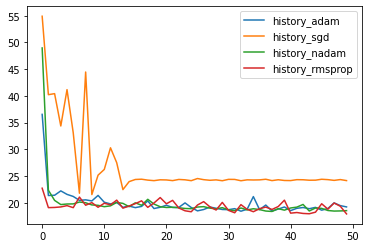

In [ ]:
plt.plot(history_adam.history['val_loss'], label = 'history_adam')
plt.plot(history_sgd.history['val_loss'], label = 'history_sgd')
plt.plot(history_nadam.history['val_loss'], label = 'history_nadam')
plt.plot(history_rmsprop.history['val_loss'], label = 'history_rmsprop')

# plt.legend(['val_loss'])
plt.legend()


In [ ]:
type(history_nadam)

keras.callbacks.History

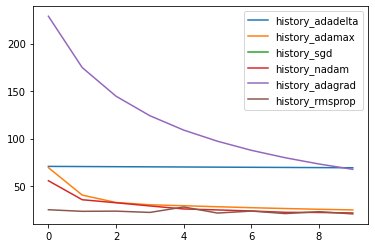

In [ ]:
plt.plot(history_adam.history['val_loss'], label = 'history_adam')
plt.plot(history_adadelta.history['val_loss'], label = 'history_adadelta')
plt.plot(history_adamax.history['val_loss'], label = 'history_adamax')
plt.plot(history_sgd.history['val_loss'], label = 'history_sgd')
plt.plot(history_nadam.history['val_loss'], label = 'history_nadam')
plt.plot(history_adagrad.history['val_loss'], label = 'history_adagrad')
plt.plot(history_rmsprop.history['val_loss'], label = 'history_rmsprop')

# plt.legend(['val_loss'])
plt.legend()
# model.evaluate(x_test, y_test)

In [ ]:
from keras.layers import Dropout
model = Sequential()
model.add(Dense(64, activation='relu', input_shape = (x_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),
    loss=['mean_squared_error']
)
history_sgd = model.fit(
    x_train, 
    y_train, 
    batch_size=32, 
    validation_data=(x_test, y_test), 
    epochs=50
)


Epoch 1/50
12/12 [==============================] - 1s 19ms/step - loss: 115.2716 - val_loss: 54.8992
Epoch 2/50
12/12 [==============================] - 0s 4ms/step - loss: 56.2908 - val_loss: 40.2288
Epoch 3/50
12/12 [==============================] - 0s 5ms/step - loss: 40.1129 - val_loss: 40.4204
Epoch 4/50
12/12 [==============================] - 0s 4ms/step - loss: 38.3185 - val_loss: 34.3723
Epoch 5/50
12/12 [==============================] - 0s 4ms/step - loss: 33.9223 - val_loss: 41.1699
Epoch 6/50
12/12 [==============================] - 0s 5ms/step - loss: 35.3316 - val_loss: 33.1043
Epoch 7/50
12/12 [==============================] - 0s 6ms/step - loss: 29.4965 - val_loss: 21.7916
Epoch 8/50
12/12 [==============================] - 0s 5ms/step - loss: 31.7317 - val_loss: 44.4669
Epoch 9/50
12/12 [==============================] - 0s 4ms/step - loss: 34.2802 - val_loss: 21.5425
Epoch 10/50
12/12 [==============================] - 0s 5ms/step - loss: 29.9284 - val_loss: 25.17

In [ ]:
from keras.layers import Dropout
model = Sequential()
model.add(Dense(64, activation='relu', input_shape = (x_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),
    loss=['mean_squared_error']
)
history_sgd = model.fit(
    X_train_minmax, 
    y_train, 
    batch_size=32, 
    validation_data=(X_test_minmax, y_test), 
    epochs=50
)


Epoch 1/50
12/12 [==============================] - 1s 17ms/step - loss: 91.4906 - val_loss: 45.5453
Epoch 2/50
12/12 [==============================] - 0s 6ms/step - loss: 38.1951 - val_loss: 32.7547
Epoch 3/50
12/12 [==============================] - 0s 3ms/step - loss: 30.9200 - val_loss: 21.3858
Epoch 4/50
12/12 [==============================] - 0s 5ms/step - loss: 27.9882 - val_loss: 21.3735
Epoch 5/50
12/12 [==============================] - 0s 4ms/step - loss: 25.7867 - val_loss: 20.5837
Epoch 6/50
12/12 [==============================] - 0s 5ms/step - loss: 24.8672 - val_loss: 19.3744
Epoch 7/50
12/12 [==============================] - 0s 5ms/step - loss: 25.1875 - val_loss: 19.2464
Epoch 8/50
12/12 [==============================] - 0s 4ms/step - loss: 24.8043 - val_loss: 19.8315
Epoch 9/50
12/12 [==============================] - 0s 4ms/step - loss: 24.7525 - val_loss: 18.6324
Epoch 10/50
12/12 [==============================] - 0s 5ms/step - loss: 24.5000 - val_loss: 18.227

# Task 2 
## Tips Dataset

In [ ]:
tips

,total_bill,tip,sex,smoker,day,time,size,sex_cat,smoker_cat,day_cat,time_cat
0,16.99,1.01,Female,No,Sun,Dinner,2,0.0,0.0,2.0,0.0
1,10.34,1.66,Male,No,Sun,Dinner,3,1.0,0.0,2.0,0.0
2,21.01,3.50,Male,No,Sun,Dinner,3,1.0,0.0,2.0,0.0
3,23.68,3.31,Male,No,Sun,Dinner,2,1.0,0.0,2.0,0.0
4,24.59,3.61,Female,No,Sun,Dinner,4,0.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1.0,0.0,1.0,0.0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.0,1.0,1.0,0.0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1.0,1.0,1.0,0.0
242,17.82,1.75,Male,No,Sat,Dinner,2,1.0,0.0,1.0,0.0


In [ ]:
y = tips['tip']
x = tips.drop(columns=['tip', 'sex', 'smoker', 'day', 'time'])

In [ ]:
x

,total_bill,size,sex_cat,smoker_cat,day_cat,time_cat
0,16.99,2,0.0,0.0,2.0,0.0
1,10.34,3,1.0,0.0,2.0,0.0
2,21.01,3,1.0,0.0,2.0,0.0
3,23.68,2,1.0,0.0,2.0,0.0
4,24.59,4,0.0,0.0,2.0,0.0
...,...,...,...,...,...,...
239,29.03,3,1.0,0.0,1.0,0.0
240,27.18,2,0.0,1.0,1.0,0.0
241,22.67,2,1.0,1.0,1.0,0.0
242,17.82,2,1.0,0.0,1.0,0.0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 25)

x_train = x_train.astype('float32')
y_train = y_train.astype('float32')
x_test = x_test.astype('float32')
y_test = y_test.astype('float32')

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape = (x_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))
model.compile(
    optimizer='adam',
    loss=['mean_absolute_error']
)
hist = model.fit(
    x_train, 
    y_train, 
    batch_size=32, 
    validation_data=(x_test, y_test), 
    epochs=10
)


Epoch 1/10
7/7 [==============================] - 1s 27ms/step - loss: 1.4261 - val_loss: 0.7027
Epoch 2/10
7/7 [==============================] - 0s 5ms/step - loss: 1.0030 - val_loss: 0.7148
Epoch 3/10
7/7 [==============================] - 0s 5ms/step - loss: 0.8136 - val_loss: 0.8185
Epoch 4/10
7/7 [==============================] - 0s 5ms/step - loss: 0.8664 - val_loss: 0.7610
Epoch 5/10
7/7 [==============================] - 0s 5ms/step - loss: 0.7947 - val_loss: 0.6925
Epoch 6/10
7/7 [==============================] - 0s 6ms/step - loss: 0.7986 - val_loss: 0.6948
Epoch 7/10
7/7 [==============================] - 0s 5ms/step - loss: 0.7796 - val_loss: 0.6903
Epoch 8/10
7/7 [==============================] - 0s 5ms/step - loss: 0.7763 - val_loss: 0.6814
Epoch 9/10
7/7 [==============================] - 0s 5ms/step - loss: 0.7706 - val_loss: 0.6816
Epoch 10/10
7/7 [==============================] - 0s 6ms/step - loss: 0.7758 - val_loss: 0.6855


In [ ]:
import pandas as pd
y_train = [1,2,3,4,5,6,7,8,9,10]
# y_train = pd.cut(y_train, [1, 4, 10], labels = [1,2])

In [ ]:
y_test.max(), y_test.min()

(44.5, 1.0)

In [ ]:
y_train.min(), y_train.max()

(1.75, 26.29)

In [ ]:
# y_train = pd.cut(
#     y_train, 
#     [min(y_train) - 1, (min(y_train) + max(y_train))/2, max(y_train)+ 1],
#     labels=[1, 2]
# )
# y_test = pd.cut(
#     y_test, 
#     [min(y_test) - 1, (min(y_test) + max(y_test))/2, max(y_test)+ 1],
#     labels=[1, 2]
# )

vals = [0, 10, 45]
y_train = pd.cut(y_train, vals, labels=[0,1])
y_test = pd.cut(y_test, vals, labels=[0,1])

In [ ]:
sum(y_test)

49

In [ ]:
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [ ]:
y_test = y_test.fillna(1.0)

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape = (x_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(
    optimizer='Adam',
    loss=['binary_crossentropy'],
    metrics=['Accuracy']
)
hist = model.fit(
    x_train, 
    y_train, 
    batch_size=32, 
    validation_data=(x_test, y_test), 
    epochs=10
)


Epoch 1/10
12/12 [==============================] - 1s 22ms/step - loss: 0.6893 - Accuracy: 0.6515 - val_loss: 0.6980 - val_Accuracy: 0.5031
Epoch 2/10
12/12 [==============================] - 0s 4ms/step - loss: 0.6492 - Accuracy: 0.6863 - val_loss: 0.6360 - val_Accuracy: 0.6708
Epoch 3/10
12/12 [==============================] - 0s 4ms/step - loss: 0.6141 - Accuracy: 0.6542 - val_loss: 0.6295 - val_Accuracy: 0.6957
Epoch 4/10
12/12 [==============================] - 0s 5ms/step - loss: 0.6263 - Accuracy: 0.6863 - val_loss: 0.6341 - val_Accuracy: 0.6957
Epoch 5/10
12/12 [==============================] - 0s 6ms/step - loss: 0.6411 - Accuracy: 0.6890 - val_loss: 0.6013 - val_Accuracy: 0.6957
Epoch 6/10
12/12 [==============================] - 0s 4ms/step - loss: 0.6037 - Accuracy: 0.6971 - val_loss: 0.5987 - val_Accuracy: 0.7081
Epoch 7/10
12/12 [==============================] - 0s 5ms/step - loss: 0.6023 - Accuracy: 0.6917 - val_loss: 0.5991 - val_Accuracy: 0.6957
Epoch 8/10
12/12 [=

In [ ]:
loss, accuracy = model.evaluate(x_test)
print("Accuracy", accuracy)

6/6 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - Accuracy: 0.0000e+00
Accuracy 0.0


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_test

478    0.0
276    0.0
49     0.0
153    0.0
20     0.0
      ... 
71     1.0
326    0.0
183    1.0
15     0.0
434    0.0
Name: wage_per_hour, Length: 161, dtype: float32

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([[0.5001233 ],
       [0.4369471 ],
       [0.4759456 ],
       [0.6431226 ],
       [0.44895884],
       [0.6521006 ],
       [0.62832695],
       [0.2542251 ],
       [0.400412  ],
       [0.51799583],
       [0.10811767],
       [0.505358  ],
       [0.58153003],
       [0.5904379 ],
       [0.5099922 ],
       [0.66551465],
       [0.5670037 ],
       [0.6272405 ],
       [0.51911163],
       [0.33343846],
       [0.39474043],
       [0.33024862],
       [0.37871936],
       [0.42539445],
       [0.5017892 ],
       [0.5942428 ],
       [0.6062174 ],
       [0.608716  ],
       [0.37832445],
       [0.37884584],
       [0.37797695],
       [0.7176659 ],
       [0.339808  ],
       [0.47576675],
       [0.6557911 ],
       [0.25612694],
       [0.5523059 ],
       [0.5002779 ],
       [0.5039577 ],
       [0.524547  ],
       [0.5344761 ],
       [0.24817765],
       [0.73022056],
       [0.3972593 ],
       [0.534776  ],
       [0.6037697 ],
       [0.47731563],
       [0.417